***Importing libraries***

In [32]:
#Деректер жинағын оқуға
import pandas as pd
#Визуализация
import matplotlib.pyplot as plt
import seaborn as sns

***Reading the dataset***

In [108]:
df = pd.read_csv('shopping_behavior_updated.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


***Printing a basic info***

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [35]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


***Vizualization***

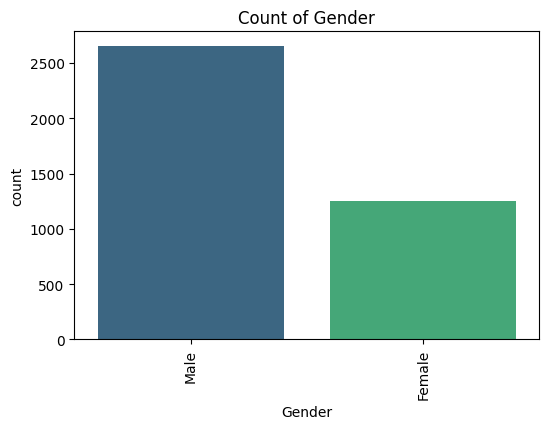

In [89]:
plt.figure(figsize=(6, 4))  
sns.countplot(x='Gender', data=df, hue='Gender', palette='viridis')
plt.title('Count of Gender')
plt.xticks(rotation=90) 
plt.show()

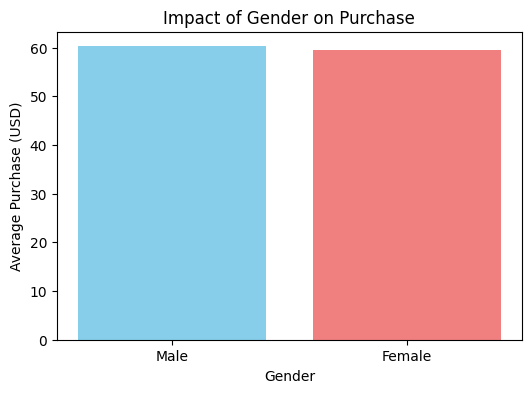

In [73]:
seasons = df['Gender'].unique()
average_purchase_by_season = df.groupby('Gender')['Purchase Amount (USD)'].mean()

plt.figure(figsize=(6, 4))
plt.bar(seasons, average_purchase_by_season, color=['skyblue', 'lightcoral', 'lightgreen', 'lightpink'])
plt.title('Impact of Gender on Purchase')
plt.xlabel('Gender')
plt.ylabel('Average Purchase (USD)')
plt.show()

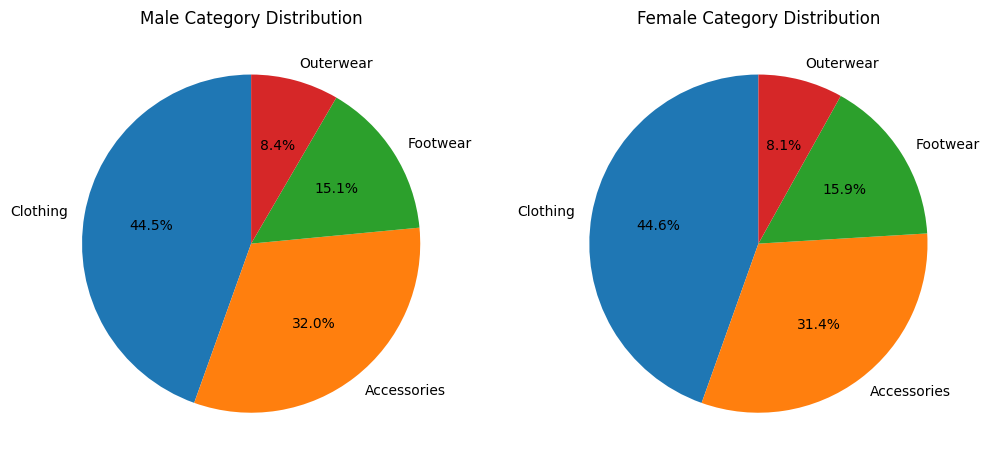

In [82]:
# Filter the DataFrame by gender
male_data = df[df['Gender'] == 'Male']
female_data = df[df['Gender'] == 'Female']

# Calculate the counts of each category for males and females
male_category_counts = male_data['Category'].value_counts()
female_category_counts = female_data['Category'].value_counts()

# Plot pie charts for both genders
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for males
axs[0].pie(male_category_counts, labels=male_category_counts.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Male Category Distribution')

# Plot for females
axs[1].pie(female_category_counts, labels=female_category_counts.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Female Category Distribution')

plt.show()

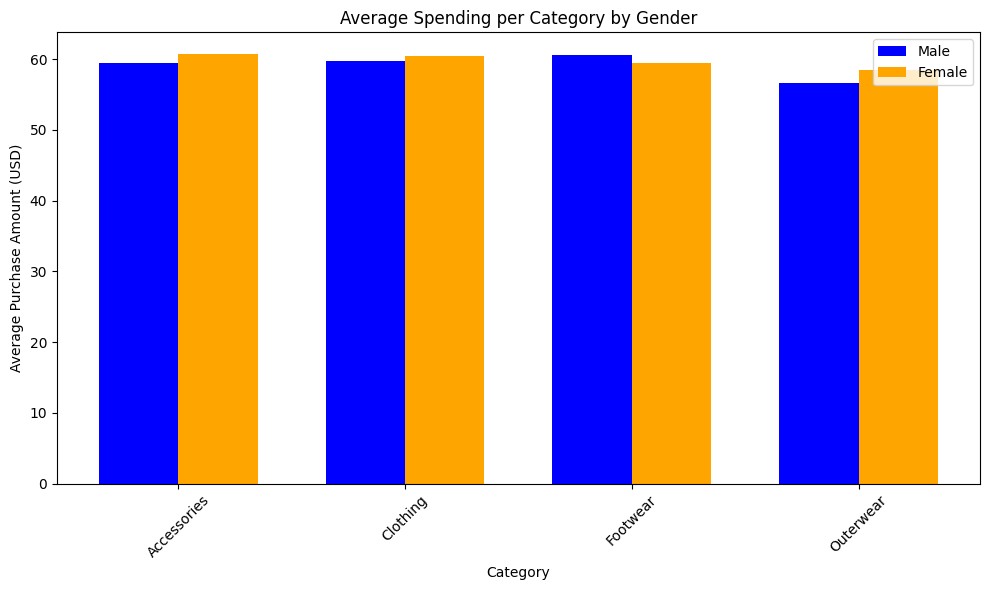

In [83]:
# Calculate the average spending per category for males and females
male_avg_spending = male_data.groupby('Category')['Purchase Amount (USD)'].mean()
female_avg_spending = female_data.groupby('Category')['Purchase Amount (USD)'].mean()

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(male_avg_spending))

ax.bar(index, male_avg_spending, bar_width, label='Male', color='blue')
ax.bar([i + bar_width for i in index], female_avg_spending, bar_width, label='Female', color='orange')

ax.set_xlabel('Category')
ax.set_ylabel('Average Purchase Amount (USD)')
ax.set_title('Average Spending per Category by Gender')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(male_avg_spending.index)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

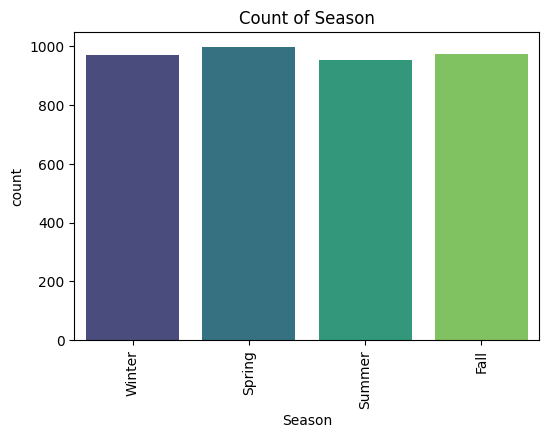

In [92]:
plt.figure(figsize=(6, 4))  
sns.countplot(x='Season', data=df, hue='Season', palette='viridis')
plt.title('Count of Season')
plt.xticks(rotation=90) 
plt.show()

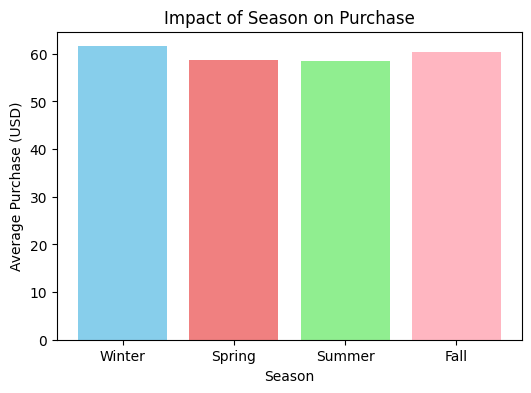

In [72]:
seasons = df['Season'].unique()
average_purchase_by_season = df.groupby('Season')['Purchase Amount (USD)'].mean()

plt.figure(figsize=(6, 4))
plt.bar(seasons, average_purchase_by_season, color=['skyblue', 'lightcoral', 'lightgreen', 'lightpink'])
plt.title("Impact of Season on Purchase")
plt.xlabel("Season")
plt.ylabel("Average Purchase (USD)")
plt.show()

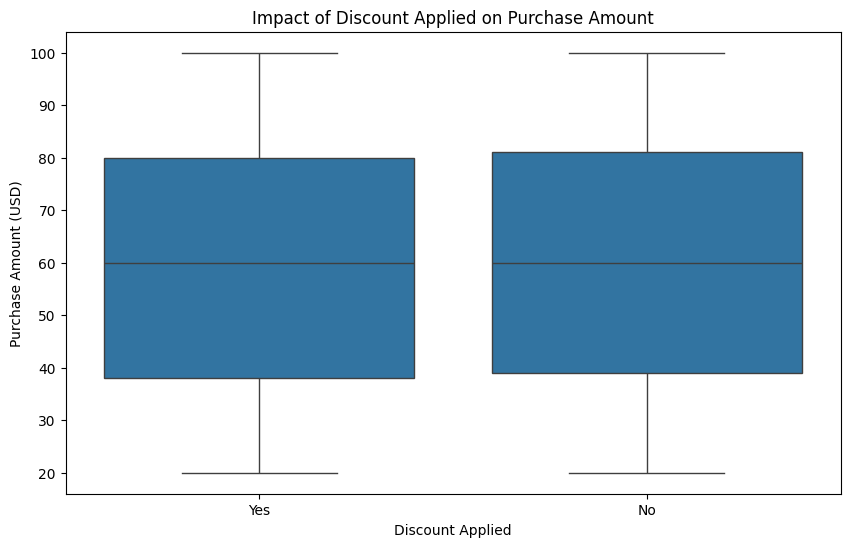

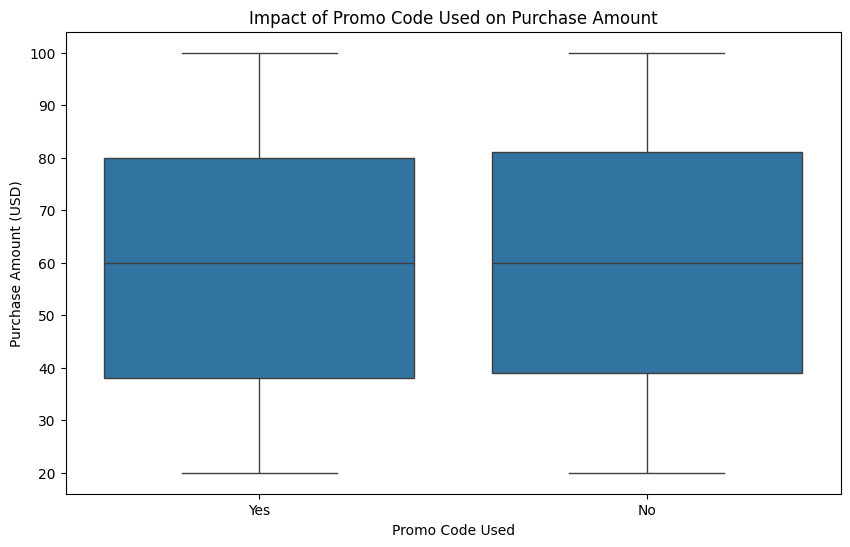

In [101]:
# Create box plots for discount applied
plt.figure(figsize=(10, 6))
sns.boxplot(x='Discount Applied', y='Purchase Amount (USD)', data=df)
plt.title('Impact of Discount Applied on Purchase Amount')
plt.show()

# Create box plots for promo code used
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promo Code Used', y='Purchase Amount (USD)', data=df)
plt.title('Impact of Promo Code Used on Purchase Amount')
plt.show()

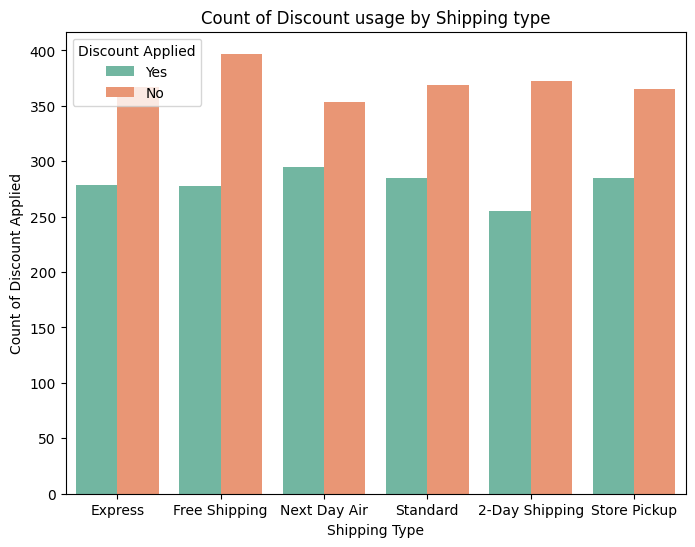

In [100]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Shipping Type', hue='Discount Applied', palette='Set2')
plt.title('Count of Discount usage by Shipping type')
plt.xlabel('Shipping Type')
plt.ylabel('Count of Discount Applied')
plt.show()

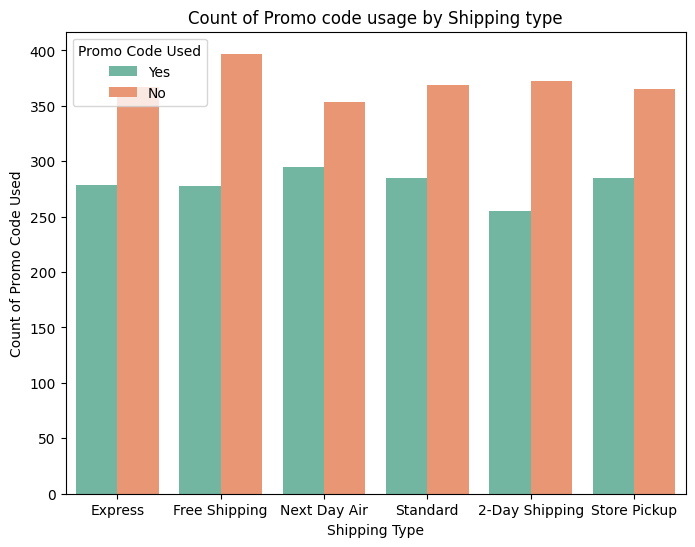

In [102]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Shipping Type', hue='Promo Code Used', palette='Set2')
plt.title('Count of Promo code usage by Shipping type')
plt.xlabel('Shipping Type')
plt.ylabel('Count of Promo Code Used')
plt.show()

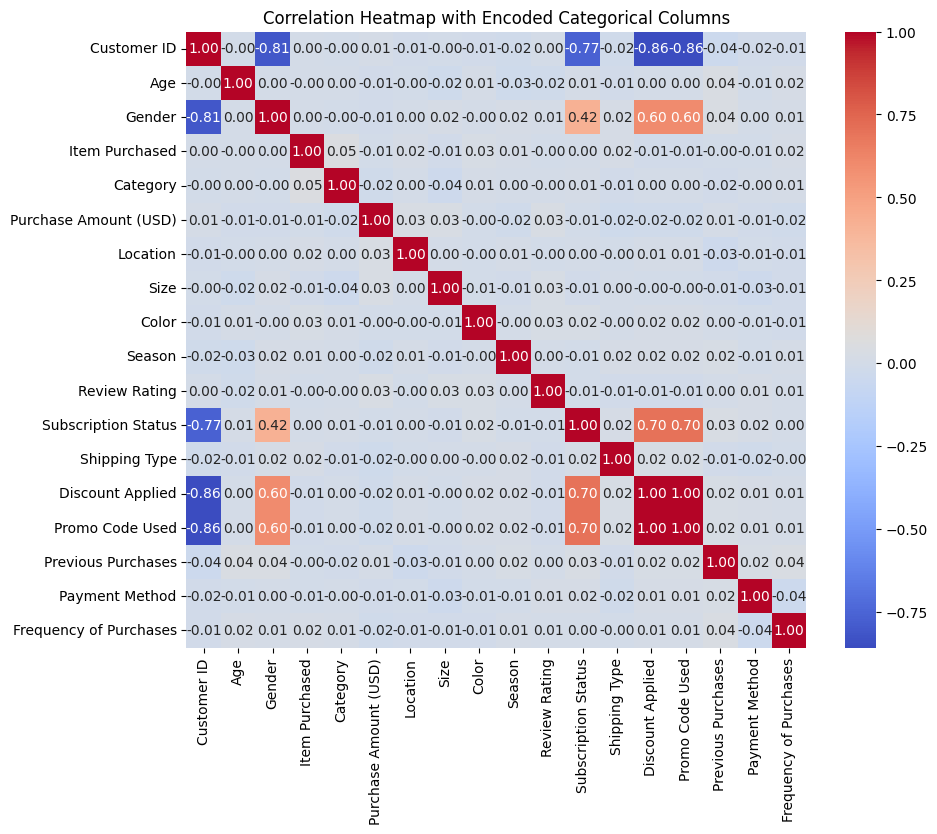

In [106]:
from sklearn.preprocessing import LabelEncoder

df_copy = df.copy()

# Select object-type columns
object_cols = df_copy.select_dtypes(include=['object']).columns.tolist()

# Create a label encoder object
label_encoder = LabelEncoder()

# Encode categorical columns
for col in object_cols:
    df_copy[col] = label_encoder.fit_transform(df_copy[col])

# Calculate the correlation matrix
corr_matrix = df_copy.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap with Encoded Categorical Columns')
plt.show()

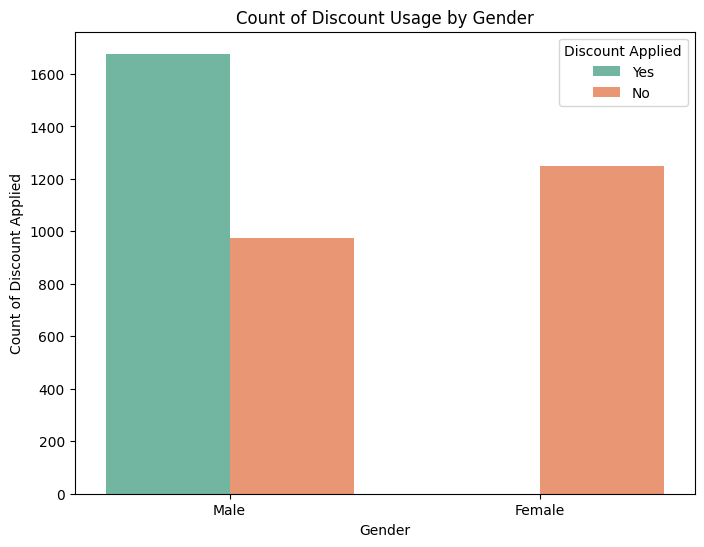

In [110]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='Discount Applied', palette='Set2')
plt.title('Count of Discount Usage by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Discount Applied')
plt.show()

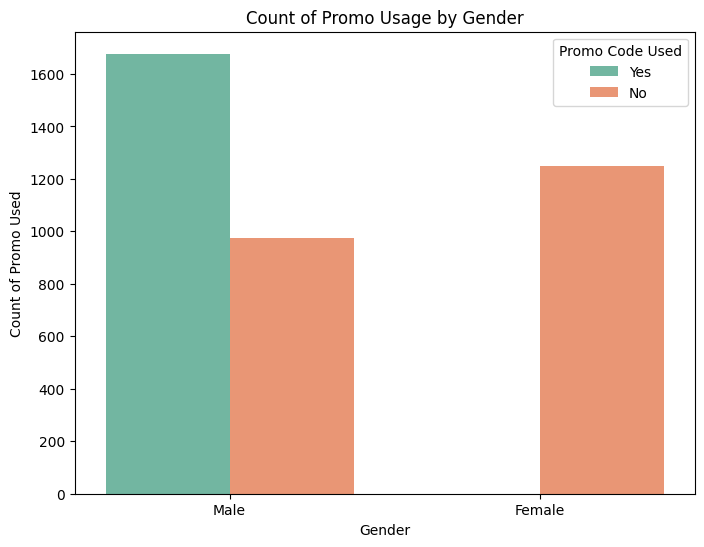

In [109]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='Promo Code Used', palette='Set2')
plt.title('Count of Promo Usage by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Promo Used')
plt.show()